<a href="https://colab.research.google.com/github/PaolaMaribel18/hands-on-2023A/blob/master/notebooks/07_linearRegression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7 Linear Regression with TensorFlow using the California Housing Dataset
The goal of this exercise is to implement a linear regression model using TensorFlow to predict **house prices** based on the California Housing Dataset. The dataset contains various features such as average income, housing average age, and more. Your task is to build a linear regression model and evaluate its performance.

##Import the required libraries:



In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

##Load the California Housing Dataset



In [ ]:
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y = pd.Series(raw['target'])
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

##Preprocess the data:



*   Normalize the features using the mean and standard deviation.

In [ ]:
# Normalize the features using the mean and standard deviation
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

* Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

##Define the TensorFlow graph:



* Create placeholders for the input features (X) and target variable (y).


In [ ]:
nf=X_train.shape[1]
X_placeholder = tf.placeholder(shape=(None, nf), dtype=tf.float32)
y_placeholder = tf.placeholder(shape=(None,), dtype=tf.float32)

In [ ]:
W = tf.Variable(tf.random_normal(shape=(nf, 1)), name='weights')
b = tf.Variable(tf.zeros(shape=(1,)), name='bias')

In [ ]:
y_pred = tf.matmul(X_placeholder, W) + b


In [ ]:
loss = tf.reduce_mean(tf.square(y_pred - y_placeholder))


In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

## Train the model


In [ ]:
# Train the model
num_epochs = 100
batch_size = 32
train_loss_history = []
val_loss_history = []


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(num_epochs):
        num_batches = len(X_train) // batch_size

        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size

            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            sess.run(train_op, feed_dict={X_placeholder: X_batch, y_placeholder: y_batch})


        if epoch % 2 == 0:
            train_loss = sess.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
            val_loss = sess.run(loss, feed_dict={X_placeholder: X_test, y_placeholder: y_test})
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)
            print(f'Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}')

    y_pred_test = sess.run(y_pred, feed_dict={X_placeholder: X_test})


Epoch 0: Training Loss = 2.1041, Validation Loss = 2.1462
Epoch 2: Training Loss = 1.3804, Validation Loss = 1.3723
Epoch 4: Training Loss = 1.3604, Validation Loss = 1.3455
Epoch 6: Training Loss = 1.3547, Validation Loss = 1.3367
Epoch 8: Training Loss = 1.3507, Validation Loss = 1.3307
Epoch 10: Training Loss = 1.3477, Validation Loss = 1.3263
Epoch 12: Training Loss = 1.3455, Validation Loss = 1.3230
Epoch 14: Training Loss = 1.3437, Validation Loss = 1.3204
Epoch 16: Training Loss = 1.3424, Validation Loss = 1.3185
Epoch 18: Training Loss = 1.3414, Validation Loss = 1.3170
Epoch 20: Training Loss = 1.3406, Validation Loss = 1.3158
Epoch 22: Training Loss = 1.3400, Validation Loss = 1.3149
Epoch 24: Training Loss = 1.3395, Validation Loss = 1.3142
Epoch 26: Training Loss = 1.3392, Validation Loss = 1.3137
Epoch 28: Training Loss = 1.3389, Validation Loss = 1.3133
Epoch 30: Training Loss = 1.3386, Validation Loss = 1.3129
Epoch 32: Training Loss = 1.3384, Validation Loss = 1.3127
Ep

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 1.2605


In [ ]:
from tabulate import tabulate
# Reshape the arrays to be 1-dimensional
y_test = y_test.values.flatten()
y_pred_test = y_pred_test.flatten()

# Print the true labels and predicted labels in a table
results_table = pd.DataFrame({'True Label': y_test[:10], 'Predicted Label': y_pred_test[:10]})
print(tabulate(results_table, headers='keys', tablefmt='psql'))

+----+--------------+-------------------+
|    |   True Label |   Predicted Label |
|----+--------------+-------------------|
|  0 |      0.477   |           2.02828 |
|  1 |      0.458   |           2.06028 |
|  2 |      5.00001 |           2.08996 |
|  3 |      2.186   |           2.09684 |
|  4 |      2.78    |           2.0837  |
|  5 |      1.587   |           2.07238 |
|  6 |      1.982   |           2.08705 |
|  7 |      1.575   |           2.07236 |
|  8 |      3.4     |           2.10404 |
|  9 |      4.466   |           2.12671 |
+----+--------------+-------------------+


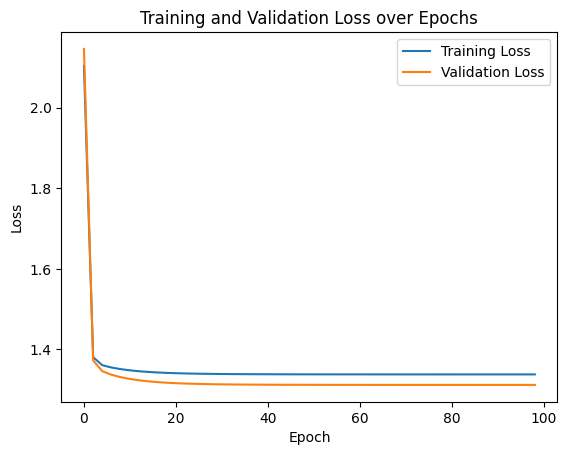

In [ ]:
# Plot the training loss
import matplotlib.pyplot as plt

epochs = range(0, num_epochs, 2)
plt.plot(epochs, train_loss_history, label='Training Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()